<a href="https://colab.research.google.com/github/HussainPythonista/Australian_Housing_Prediction/blob/main/Housing_DataSet_Data_Cleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statements:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.
 

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 
Dataset Location:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

### Steps gonna take to create Model:

### Importing Necessary Libraries and Understanding Data
### Data Cleaning
### EDA

- Due to length of notebook I prepare and Building Model in different Note_book 


## Importing Necessary Libraries and Understanding Data

This is initail step while building the model,Importing Necessary Library and Understanding the basic summary of Dataset.

In [ ]:
#Importing Necessary Library

#Basic Numerical Operation
import pandas as pd
import numpy as np

#visualize the data
import matplotlib.pyplot as plt
import seaborn as sb


#ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Importing Dataset**

In [ ]:
house_price=pd.read_csv("/content/drive/MyDrive/ML_Dataset/Housing_Australian/train.csv")
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Checking the shape of Dataset
house_price.shape

(1460, 81)

In [ ]:
#Basic information about datast
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Basic summary statistics information
house_price.describe(percentiles=[0.25,0.67,0.75,0.90,0.975]).T

,count,mean,std,min,25%,50%,67%,75%,90%,97.5%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,978.53,1095.25,1314.1,1423.525,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,60.00,70.00,120.0,180.000,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,77.00,80.00,96.0,120.000,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,10787.71,11601.50,14381.7,22698.250,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,7.00,8.0,9.000,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,6.00,7.0,8.000,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,1995.00,2000.00,2006.0,2008.000,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2001.00,2004.00,2006.0,2008.000,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,98.17,166.00,335.0,612.700,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,619.00,712.25,1065.5,1408.100,5644.0


**Initial Insights:**

- Our dataset is not that musch big in the case of rows, it is way little more big in column wise.
- The most Interesting thing is we have lot of variables to clean ie we have huge number of NaN values.
- Some of the columns has outliers as well,we need to handle that as well

## Data Cleaning

In [ ]:
house_price["GarageYrBlt"]=house_price["GarageYrBlt"].astype(str)
house_price["GarageYrBlt"]=house_price["GarageYrBlt"].apply(lambda x:x[:-2] if x[-1]=="0" else x)

In [ ]:
#Checking NaN values in columns
NaN_columns=house_price.isnull().sum()
house_price[NaN_columns[NaN_columns>0].index]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


**While checking the data description I found some the NaN columns which means that feature is Not Present in that house, Eventhough there is huge number of NaN values in columns dropping those columns is not wise decision,So, Im going to fill it with No Feature**

In [ ]:
house_price[["Alley","PoolQC","Fence","MiscFeature","BsmtQual",
 "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
 "Electrical","FireplaceQu","GarageType","MasVnrType",
 "GarageFinish","GarageQual","GarageCond","GarageYrBlt"]]=house_price[["Alley",
 "PoolQC","Fence","MiscFeature","BsmtQual",
 "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
 "Electrical","FireplaceQu","GarageType","MasVnrType","GarageFinish","GarageQual","GarageCond","GarageYrBlt"]].fillna("No Feature")

In [ ]:
#Checking NaN values in columns
NaN_columns=house_price.isnull().sum()
house_price[NaN_columns[NaN_columns>0].index]

,LotFrontage,MasVnrArea
0,65.0,196.0
1,80.0,0.0
2,68.0,162.0
3,60.0,0.0
4,84.0,350.0
...,...,...
1455,62.0,0.0
1456,85.0,119.0
1457,66.0,0.0
1458,68.0,0.0


In [ ]:
house_price[["LotFrontage","MasVnrArea"]]=house_price[["LotFrontage","MasVnrArea"]].fillna(0)

In [ ]:
#Checking NaN values in columns
NaN_columns=house_price.isnull().sum()
NaN_columns[NaN_columns>0]

Series([], dtype: int64)

**Step's I'd take To handle NaN values:**
- NaN values in categorical values means that specific feature Not Present in that particular House, so i fill it as **No Feature**
- At the Same time Some nmerical columns also has some NaN values, in that case I fill it with Zero, Because That feature Not Present.


**There is no use of keeping Id column in Dataset, so I dropped it**

In [ ]:
#Dropping ID column
house_price.drop(columns="Id",inplace=True)

In [ ]:
house_price

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0,No Feature,No Feature,No Feature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Feature,Reg,Lvl,AllPub,FR2,...,0,No Feature,No Feature,No Feature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,0,No Feature,No Feature,No Feature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Feature,IR1,Lvl,AllPub,Corner,...,0,No Feature,No Feature,No Feature,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Feature,IR1,Lvl,AllPub,FR2,...,0,No Feature,No Feature,No Feature,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0,No Feature,No Feature,No Feature,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0,No Feature,MnPrv,No Feature,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0,No Feature,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0,No Feature,No Feature,No Feature,0,4,2010,WD,Normal,142125


In [ ]:
#Basic Descriptive Statistics for understanding Data
house_price.describe([0.25,0.50,0.75,0.90,0.997]).T

,count,mean,std,min,25%,50%,75%,90%,99.7%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,120.0,190.000,190.0
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,92.0,171.738,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,14381.7,68169.502,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,8.0,10.000,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,7.0,9.000,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2006.0,2009.000,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2006.0,2010.000,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,335.0,1089.364,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,1065.5,1894.952,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,117.2,1073.591,1474.0


While Checking the initial Descriptive Statistics, we can clearly see that we have huge outliers in each and every column, creating models with outliers will skew our results too much, so better handle that so,In next step I'm gonna handle Outliers.

### Visualize the trend in data before and after handle the outliers

- Lets check the trend as well before and after Handling Outliers

##### Numerical Columns against Target Column

- This particular operation will explain how the trean Looks like 

**Most Important one I'm gonna create the scatter plot Before and After the handling outliers**

- I'm doing above step because I want to understand how My trends are agetting change after handling outliers

In [ ]:
#Gatehering the Numerical columns only for handling outliers
numerical_columns=house_price.select_dtypes(["int","float"]).columns
len(numerical_columns)

36

In [ ]:
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Checking and Handling Outliers


#### Creating functions for handling and visualizing the outliers

- **Creating the functions for visualize the distribution of data**
- **Creating the function for capping the outlier values method**

There is no use of dropping outlier values, so better keeping those value and handling those outliers is best method 

In [ ]:
def scatter_plot(batch_data):
    # #batch_1=numerical_columns[:9]
    # fig=plt.subplots(figsize=(20, 20))

    # for i, feature in enumerate(batch_data):
    #     plt.subplot(9, 3, i+1)
    #     plt.subplots_adjust(hspace = 2.0)
    #     #sb.boxplot(Dataset[feature], Dataset['SalePrice'])
    #     plt.scatter(house_price[feature],house_price["SalePrice"])
    #     plt.set_title("Linear")
    #     plt.xlabel(house_price[feature])
    #     # sb.scatter(x, y, c ="blue")
    #     plt.tight_layout()
    equal_length=6
    row=int(equal_length//3)
    col=int(equal_length//2)

    fig=plt.figure(figsize=(20,10))

    # create subplots
    ax = fig.subplots(row, col)
    count=0
    for i in range(row):
      for j in range(col):
        ax[i,j].scatter(house_price[batch_data[count]],house_price["SalePrice"])
        ax[i,j].set_title([batch_data[count]])
        count+=1

In [ ]:
def creating_sub_boxplot(columns):
  equal_length=6
  row=int(equal_length//3)
  col=int(equal_length//2)

  fig=plt.figure(figsize=(20,10))

  # create subplots
  ax = fig.subplots(row, col)
  count=0
  for i in range(row):
    for j in range(col):
      ax[i,j].boxplot(house_price[columns[count]])
      ax[i,j].set_title([columns[count]])
      count+=1

  

In [ ]:
def handling_outliers(data_point,column_name): 
  ##Median of the variables
  Median=house_price[column_name].median()

  #Higher quartile and lower quartile
  Q3=house_price[column_name].quantile(0.75)
  Q1=house_price[column_name].quantile(0.25)

  #IQR Range
  IQR=Q3-Q1

  #upper fince and lower fince
  lowerFince=Q1-1.5*IQR
  upperFince=Q3+1.5*IQR

  if data_point>upperFince:
    return upperFince
  elif data_point<lowerFince:
    return lowerFince
  else:
    return data_point


**Passing the batch of columns to the function, for better understanding the distribution and handling those outlier values**

#### Batch 1 of data

In [ ]:
#Batch_wise passing the columns
batch_1=numerical_columns[0:6]

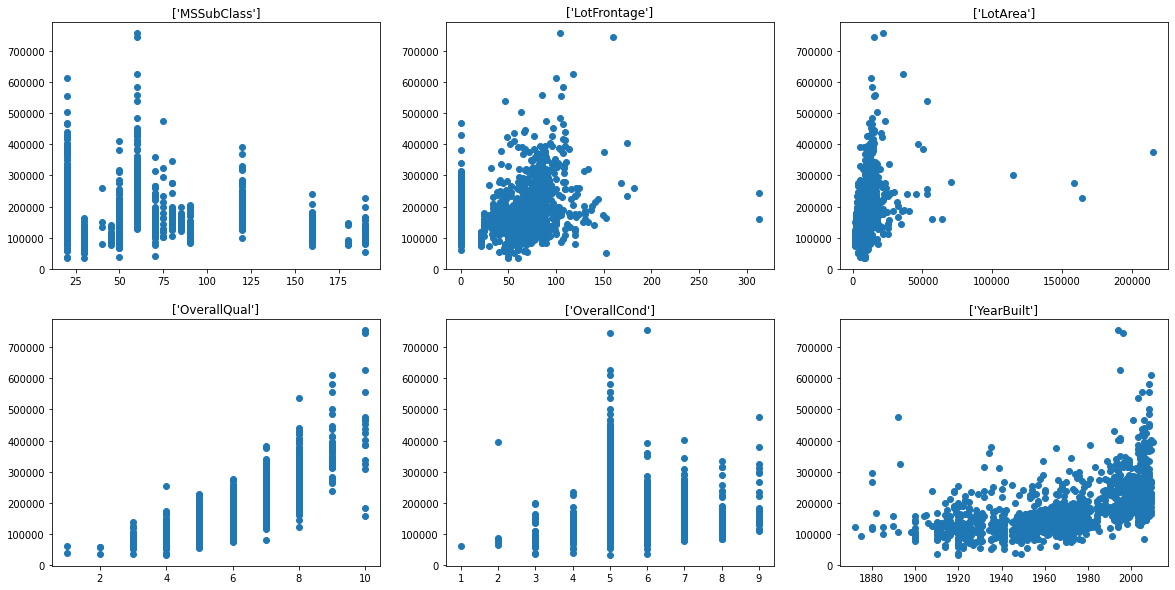

In [ ]:
# Create Scatter Plot to understand Distribution
scatter_plot(batch_1)

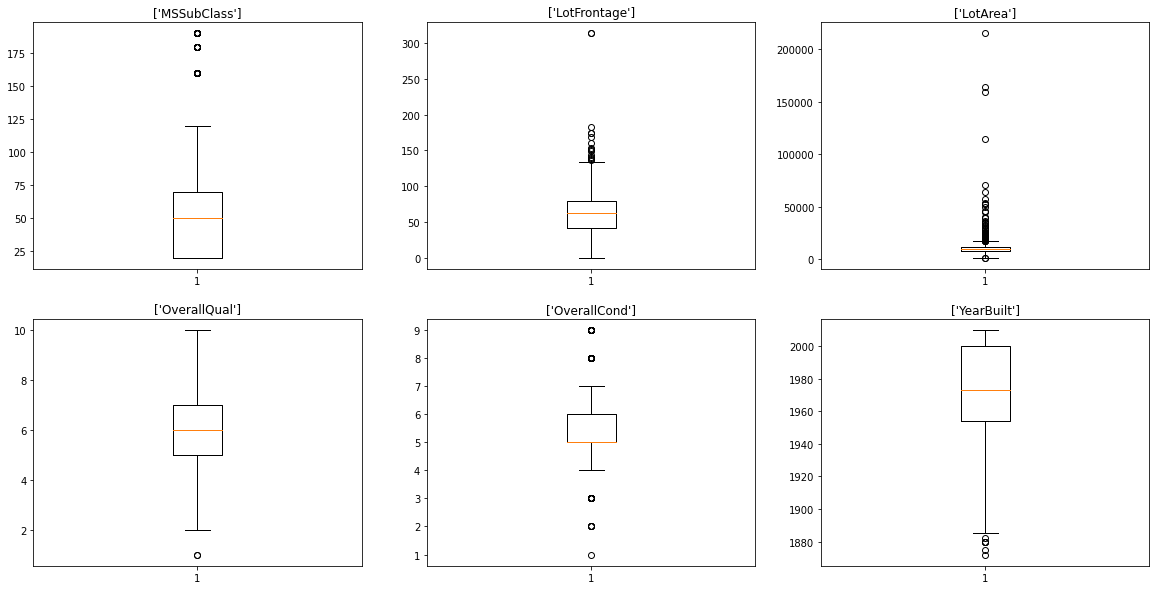

In [ ]:
#Passing the columns to create subplot using boxplot
creating_sub_boxplot(batch_1)

Desision:

- MSSubClass - only 3 values are more than upper wisker
- LotFrontage - 90% of values are in distribution, only 10% are greater than distribution
- LotArea - 90% of values are in distribution, only 10% are greater than distribution
- OverallQual - only 1 Value is less than lower wisker
- OverallCond - only 3 values are lower than lesser wisker
- Year build - I'm gonna consider Categorical variable, so I'm not gonna handlie this outlier

In [ ]:
#Handling outliers

for column in batch_1:
  # if column!="YearBuilt":

    house_price[column]=house_price[column].apply(lambda x:handling_outliers(x,column))


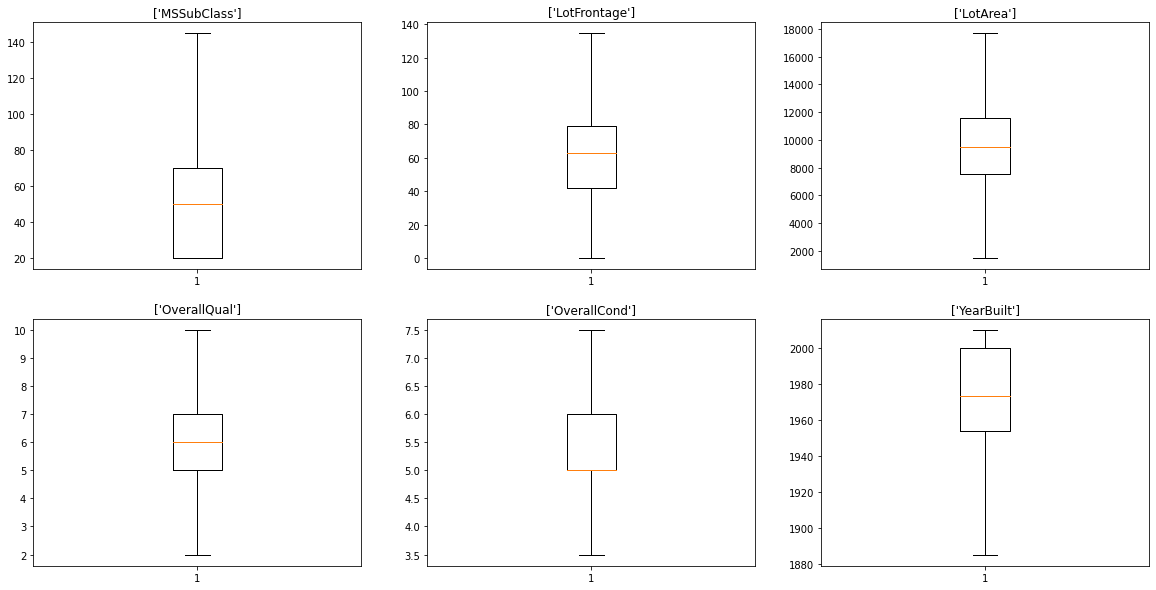

In [ ]:


#Passing the columns to create subplot using boxplot
creating_sub_boxplot(batch_1)

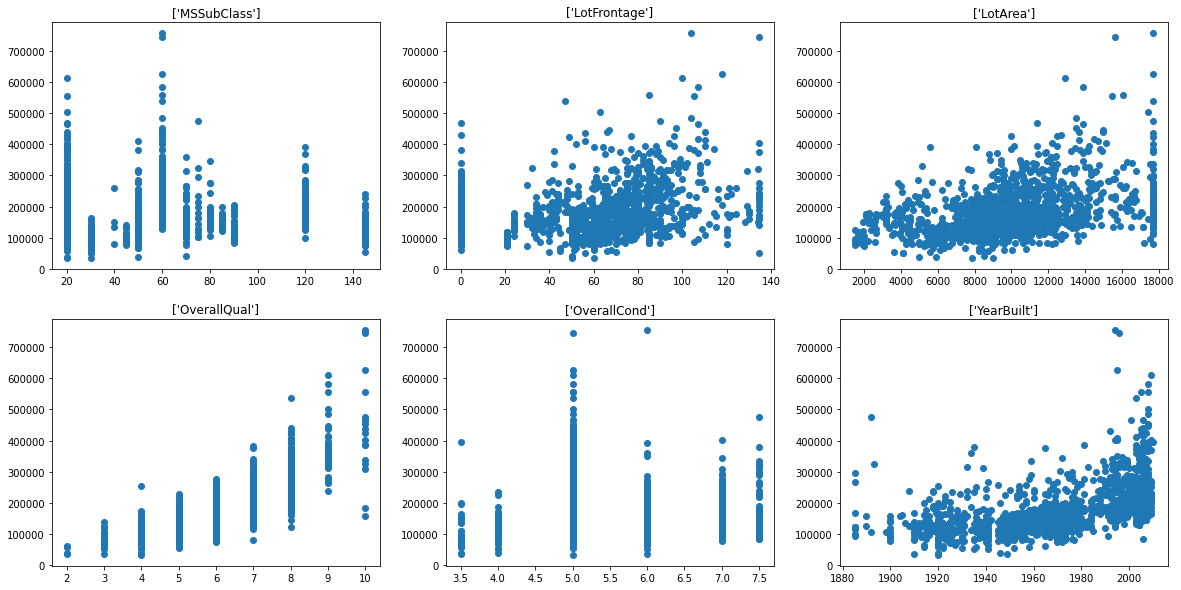

In [ ]:
# Create Scatter Plot to understand Distribution
scatter_plot(batch_1) 

#### Batch 2 of data


In [ ]:
#Batch_wise passing the columns
batch_2=numerical_columns[6:12]


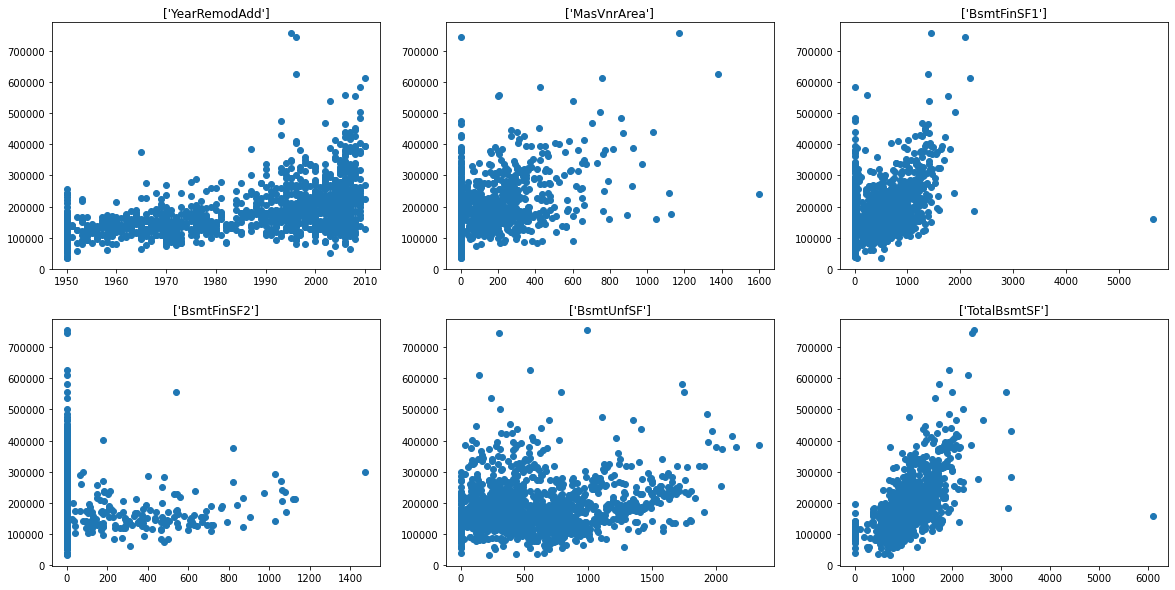

In [ ]:
# Create Scatter Plot to understand Distribution
scatter_plot(batch_2)

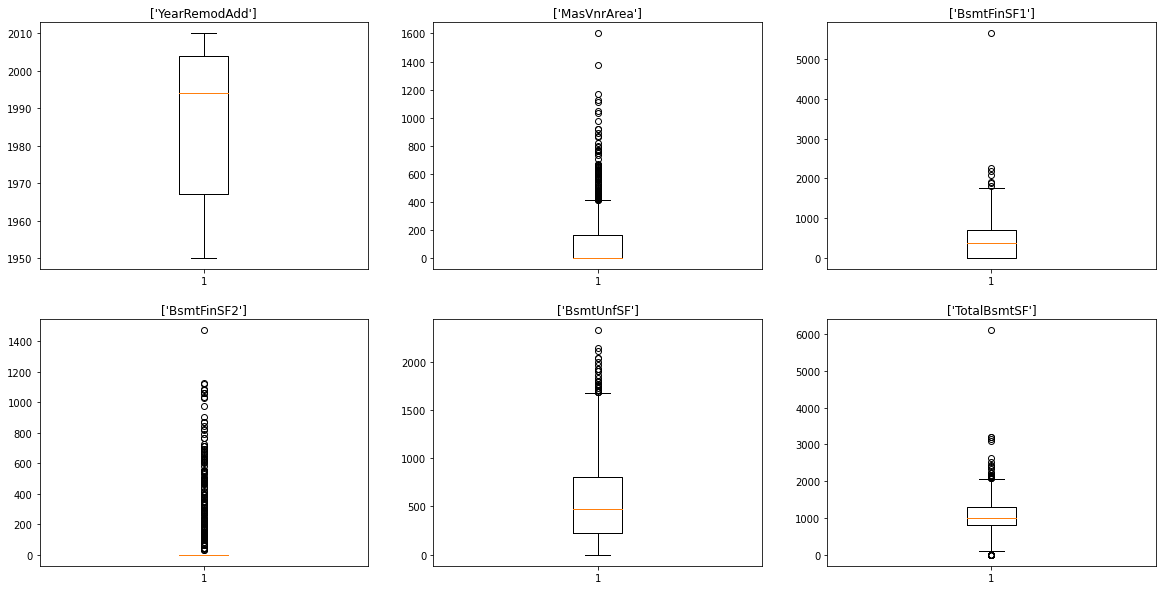

In [ ]:

#Passing the columns to create subplot using boxplot

creating_sub_boxplot(batch_2)


In [ ]:
batch_2

Index(['YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF'],
      dtype='object')

**Desicion:**
- MasVnrArea - 90% distribution is lesser tha 335, only 10% values greater than 335.
- BsmtFinSF1 - It has some the outliers values, but it has one high outlier values, we need to handle than, so better handles this.
- BsmtFinSF2- More than 90% of values are outliers, Most of the homes are not having the Second basement
- BsmtUnfSF - 90% distribution is lesser than 1232
- TotalBsmtSF - 90% distribution is lesser than 2000

In [ ]:
#Handling outliers

for column in batch_2:
  
  house_price[column]=house_price[column].apply(lambda x:handling_outliers(x,column))


In [ ]:
#Passing the columns to create subplot using boxplot

creating_sub_boxplot(batch_2)


In [ ]:

#Passing the columns to create subplot using boxplot

scatter_plot(batch_2)


#### Batch_3 data

In [ ]:
#Batch_wise passing the columns
batch_3=numerical_columns[12:18]

#Passing the columns to create subplot using boxplot

creating_sub_boxplot(batch_3)


In [ ]:
#Scatter plotting the Numerical column vs Sale-Price
scatter_plot(batch_3)

In [ ]:

#Passing the columns to create subplot using boxplot

creating_sub_boxplot(batch_3)


In [ ]:
batch_3

**Decision:**
- LowQualFinSF,BsmtHalfBath- These two column has 90% of values as 0 or 1
- GrLivArea,1stFlrSF- Has 10% of Outliers


In [ ]:
#Handling outliers

for column in batch_3:
  
  house_price[column]=house_price[column].apply(lambda x:handling_outliers(x,column))

creating_sub_boxplot(batch_3)


In [ ]:
#Scatter plotting the Numerical column vs Sale-Price
scatter_plot(batch_3)

#### Batch_4 data's handle

In [ ]:
#Batch_wise passing the columns
batch_4=numerical_columns[18:24]

#Passing the columns to create subplot using boxplot

creating_sub_boxplot(batch_4)


In [ ]:
#Scatter plotting the Numerical column vs Sale-Price
scatter_plot(batch_4)

In [ ]:
batch_4

In [ ]:
#Handling outliers

for column in batch_4:
  
  house_price[column]=house_price[column].apply(lambda x:handling_outliers(x,column))

creating_sub_boxplot(batch_4)


In [ ]:
#Scatter plotting the Numerical column vs Sale-Price
scatter_plot(batch_4)

#### Batch_5 data handling

In [ ]:
#Batch_wise passing the columns
batch_5=numerical_columns[24:30]

#Passing the columns to create subplot using boxplot

creating_sub_boxplot(batch_5)


In [ ]:
batch_5

**Decision:**

- GarageCars - This column contains only one outlier
- EnclosedPorch, 3SsnPorch - These 2 column contains 90% values are 0
- OpenPorchSF - These column's 90% values are less than 200
- GarageArea,WoodDeckSF - Has 10% values of outliers

In [ ]:
#Handling outliers

for column in batch_5:
  
  house_price[column]=house_price[column].apply(lambda x:handling_outliers(x,column))

creating_sub_boxplot(batch_5)


In [ ]:
#Scatter plotting the Numerical column vs Sale-Price
scatter_plot(batch_5)

#### Batch_6 data handling

In [ ]:
#Batch_wise passing the columns
batch_6=numerical_columns[30:36]

#Passing the columns to create subplot using boxplot

creating_sub_boxplot(batch_6)


In [ ]:
batch_6

In [ ]:
#Scatter plotting the Numerical column vs Sale-Price
scatter_plot(batch_6)

**Desision:**
- ScreenPorch,PoolArea,MiscVal - These three columns contains only 0's as 90 percent values

- SalePrice is a target column, so I'm gonna change the distribtion of target column


In [ ]:
#Handling outliers

for column in batch_6:
  if column!="SalePrice":
    house_price[column]=house_price[column].apply(lambda x:handling_outliers(x,column))

creating_sub_boxplot(batch_6)


In [ ]:
#Scatter plotting the Numerical column vs Sale-Price
scatter_plot(batch_6)

In [ ]:
house_price

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0.0,No Feature,No Feature,No Feature,0.0,2,2008,WD,Normal,208500
1,20.0,RL,80.0,9600.0,Pave,No Feature,Reg,Lvl,AllPub,FR2,...,0.0,No Feature,No Feature,No Feature,0.0,5,2007,WD,Normal,181500
2,60.0,RL,68.0,11250.0,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,0.0,No Feature,No Feature,No Feature,0.0,9,2008,WD,Normal,223500
3,70.0,RL,60.0,9550.0,Pave,No Feature,IR1,Lvl,AllPub,Corner,...,0.0,No Feature,No Feature,No Feature,0.0,2,2006,WD,Abnorml,140000
4,60.0,RL,84.0,14260.0,Pave,No Feature,IR1,Lvl,AllPub,FR2,...,0.0,No Feature,No Feature,No Feature,0.0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0.0,No Feature,No Feature,No Feature,0.0,8,2007,WD,Normal,175000
1456,20.0,RL,85.0,13175.0,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0.0,No Feature,MnPrv,No Feature,0.0,2,2010,WD,Normal,210000
1457,70.0,RL,66.0,9042.0,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0.0,No Feature,GdPrv,Shed,0.0,5,2010,WD,Normal,266500
1458,20.0,RL,68.0,9717.0,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,0.0,No Feature,No Feature,No Feature,0.0,4,2010,WD,Normal,142125


### Insights:
Below are some of the columns which is numerical columns those are how much corelate with Target variable:

**I categorize it as High,Moderate, and Low Categories**
- BSmtFinSF1(High),1stFlrSF(High),2ndFlrSF(High),TotalBsmtSF(High),TotRmsAbvGrd(High)
- MasVnrArea(Moderate),BsmtUnfSF(Moderate)
LotFrontage(Moderate),LotArea(Moderate),YearBuild(Moderate)
- GarageArea
,YearRemodAdd(Low),LowQualFinSF(Low),GrLivArea

### EDA

In [ ]:
# 
categorical_Columns=house_price.select_dtypes("object").columns
categorical_Columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

##### Steps:
- Initially I'm gonna create subplot for single columns
- Side by side we plot against Sales Price and Total frequency of Categories

**Visualizing the information in both Frequency as well as Price of house**

In [ ]:
### Creating Functions for the 
def creating_sub_barplot(columns):
  fig=plt.figure(figsize=(25,15))
  ax = fig.subplots(4, 2)
  count=0

  #list_column=['MSZoning', 'Street', 'Alley', 'LotShape']
  list_column=columns
  for i in range(len(list_column)):
      frequency_calculation=house_price[list_column[i]].value_counts()
      sale_value_against_category=pd.pivot_table(data=house_price,index=house_price[list_column[i]],values="SalePrice").sort_values(by="SalePrice")
      ax[i,0].bar(frequency_calculation.index,frequency_calculation.values)
      ax[i,0].set_title(list_column[i])
      ax[i,1].bar(sale_value_against_category.index,sale_value_against_category.SalePrice,color='red')
      ax[i,1].set_title(f"{list_column[i]} vs SalePrice" )  
      ax[i,0].set_xticklabels(frequency_calculation.index,rotation=45)
      ax[i,1].set_xticklabels(frequency_calculation.index,rotation=45)


#### Plotting categories with sales price

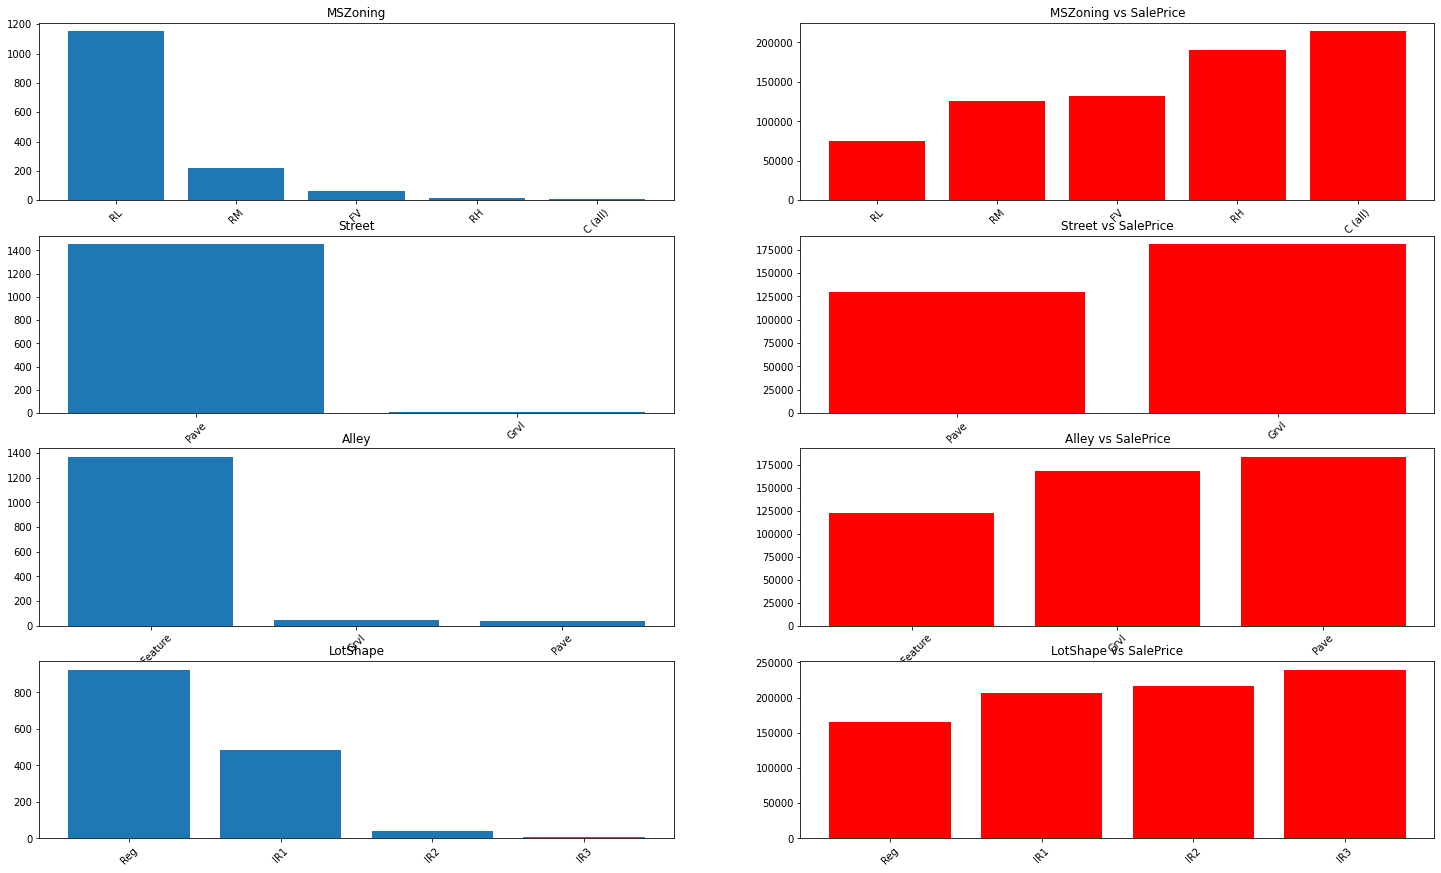

In [ ]:
creating_sub_barplot(categorical_Columns[:4])

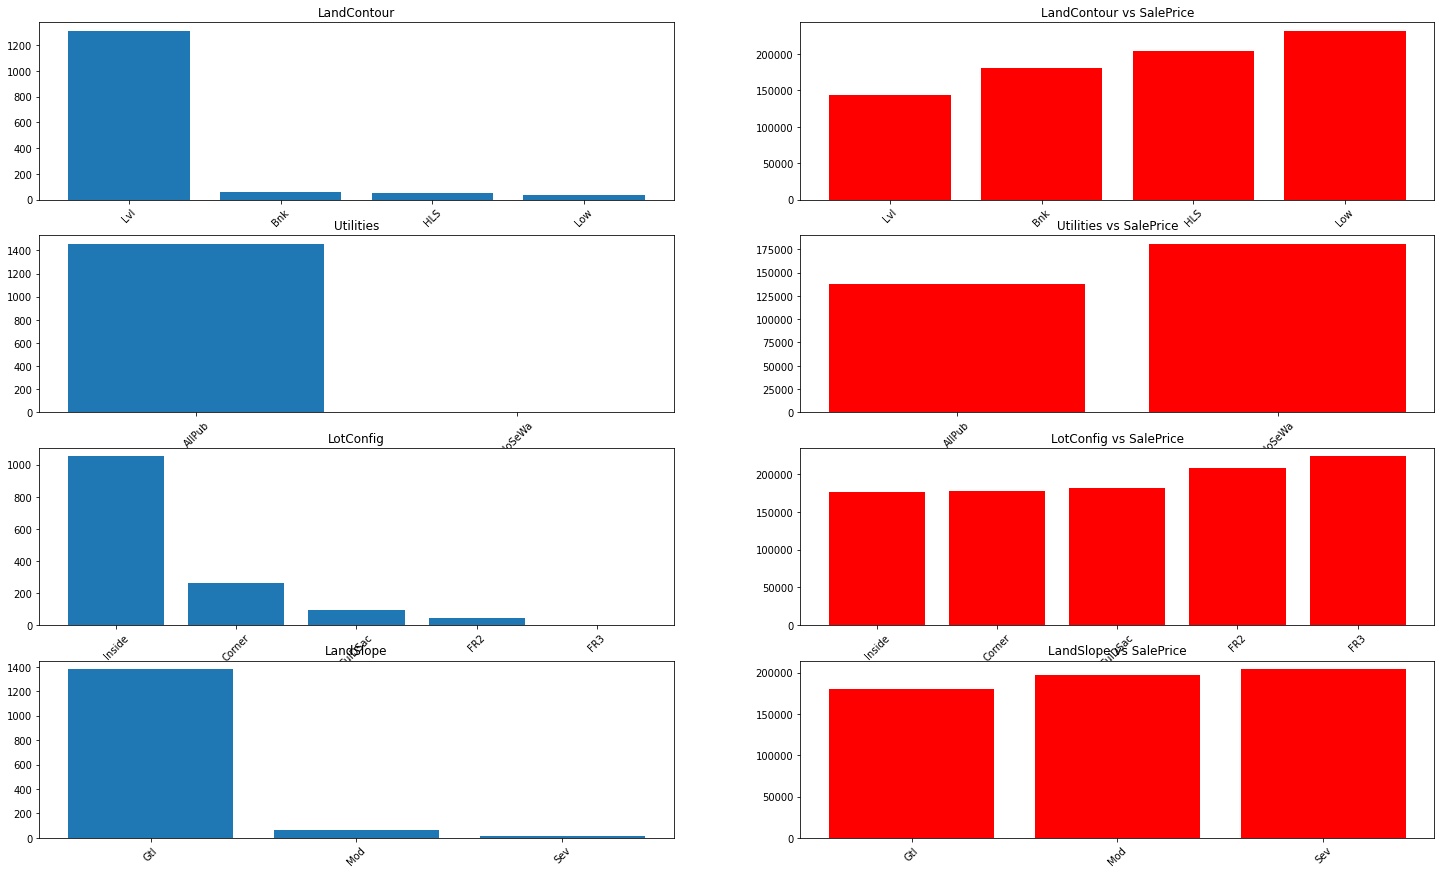

In [ ]:
creating_sub_barplot(categorical_Columns[4:8])

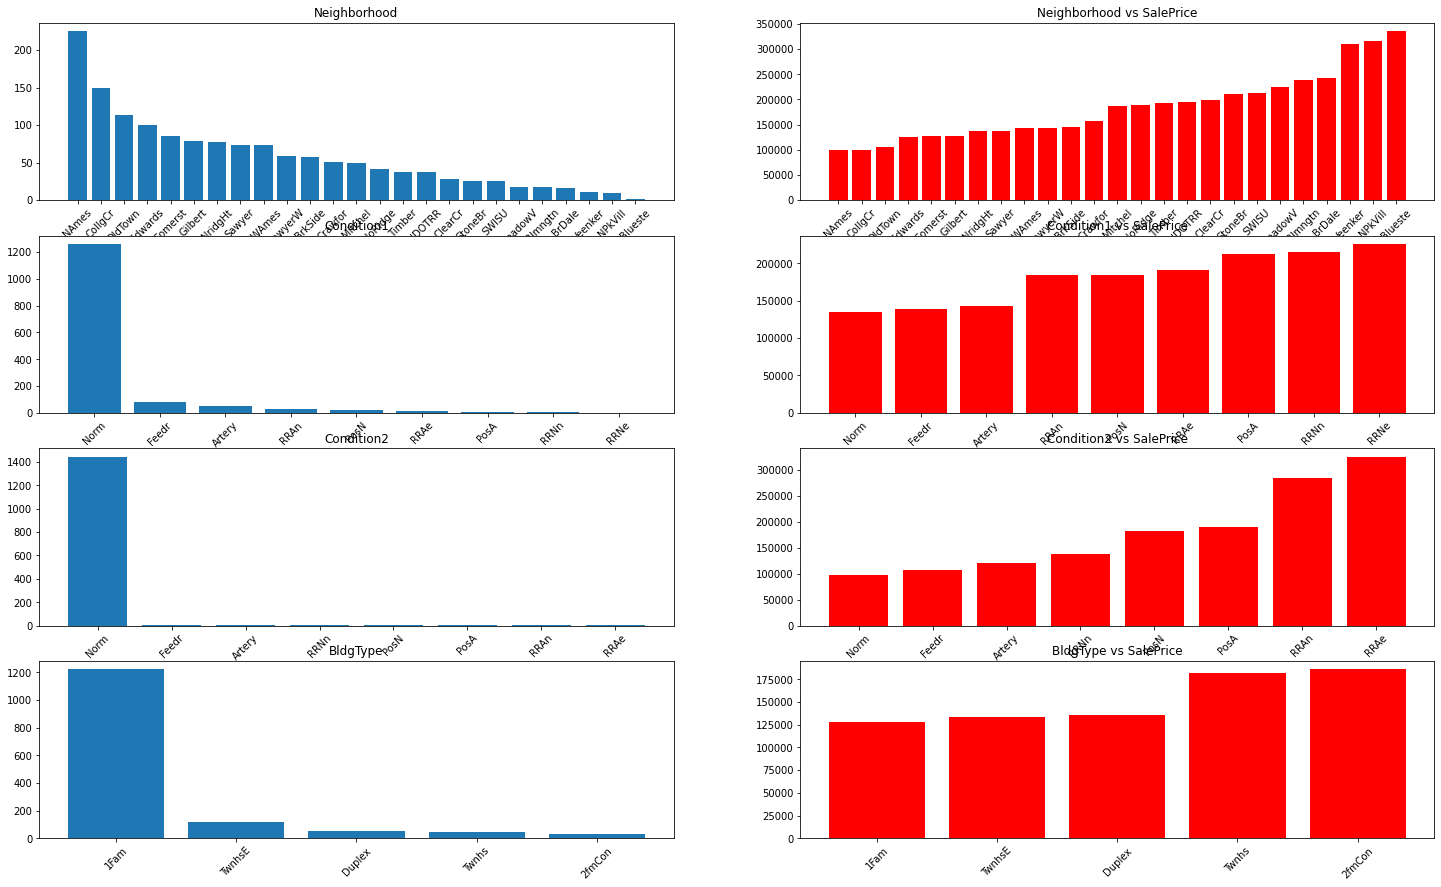

In [ ]:
creating_sub_barplot(categorical_Columns[8:12])

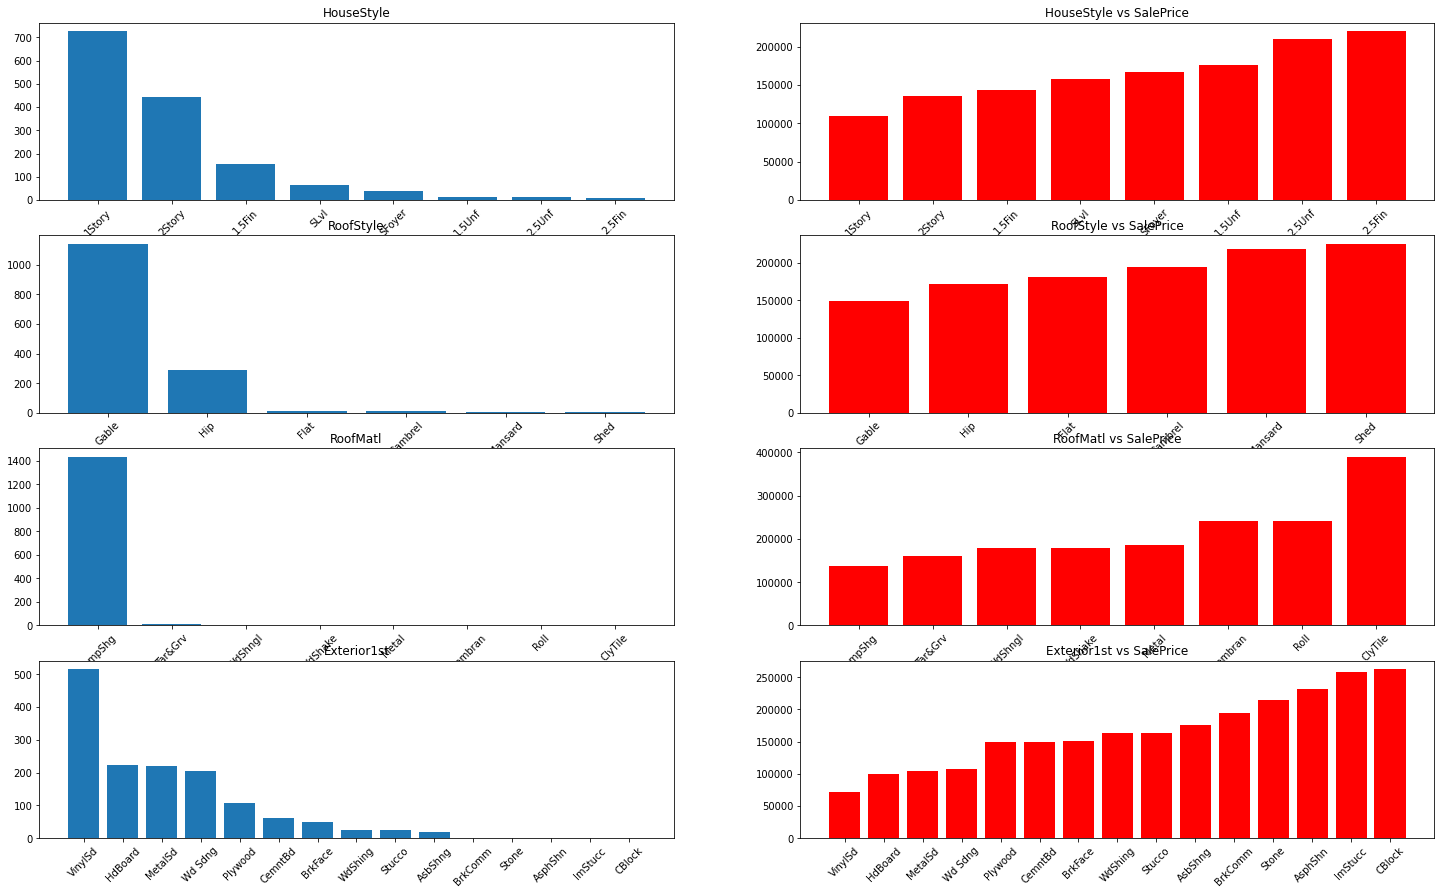

In [ ]:
creating_sub_barplot(categorical_Columns[12:16])

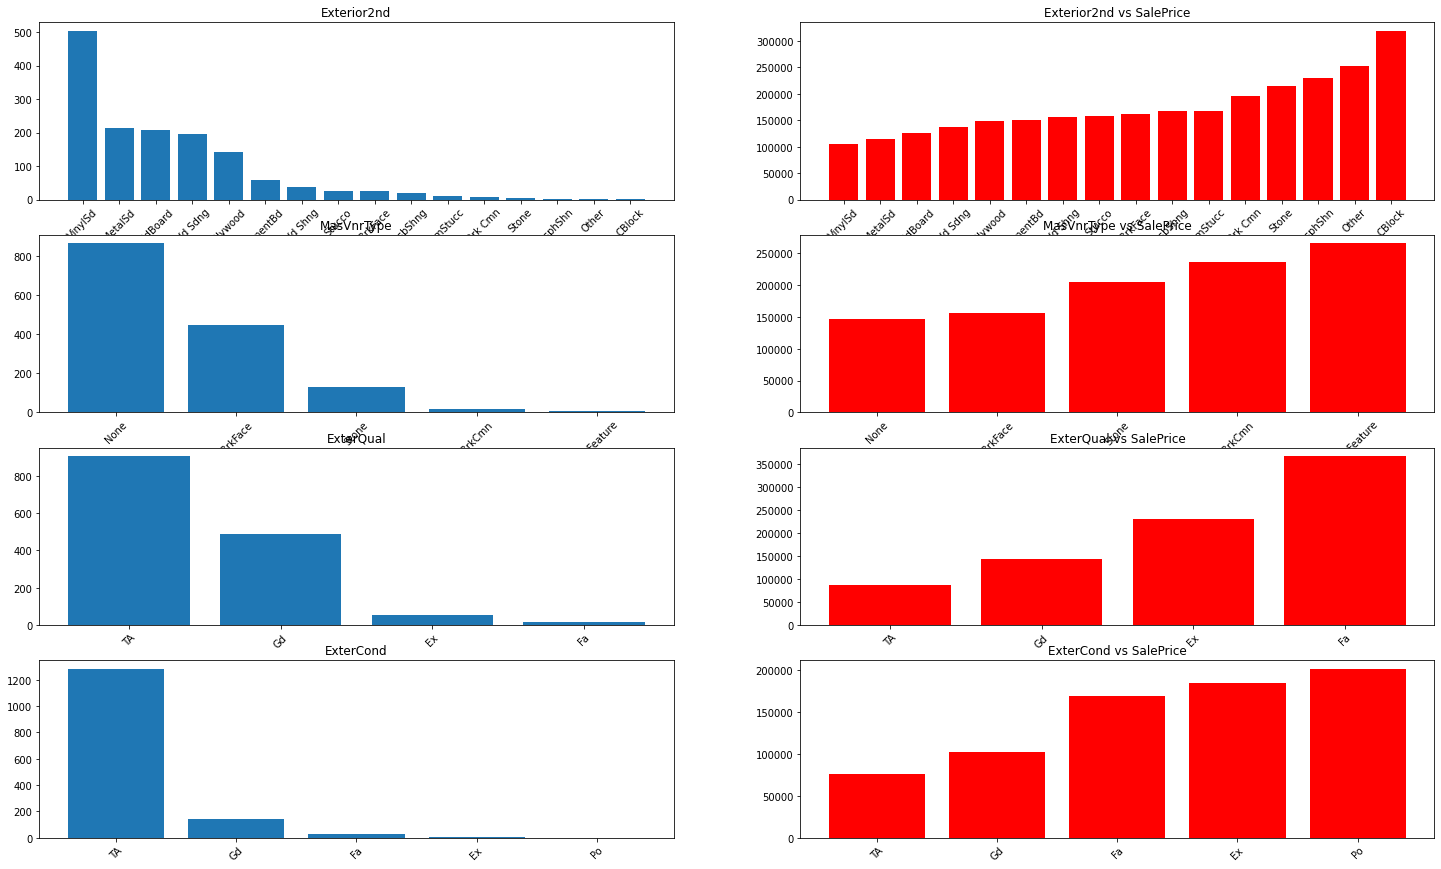

In [ ]:
creating_sub_barplot(categorical_Columns[16:20])

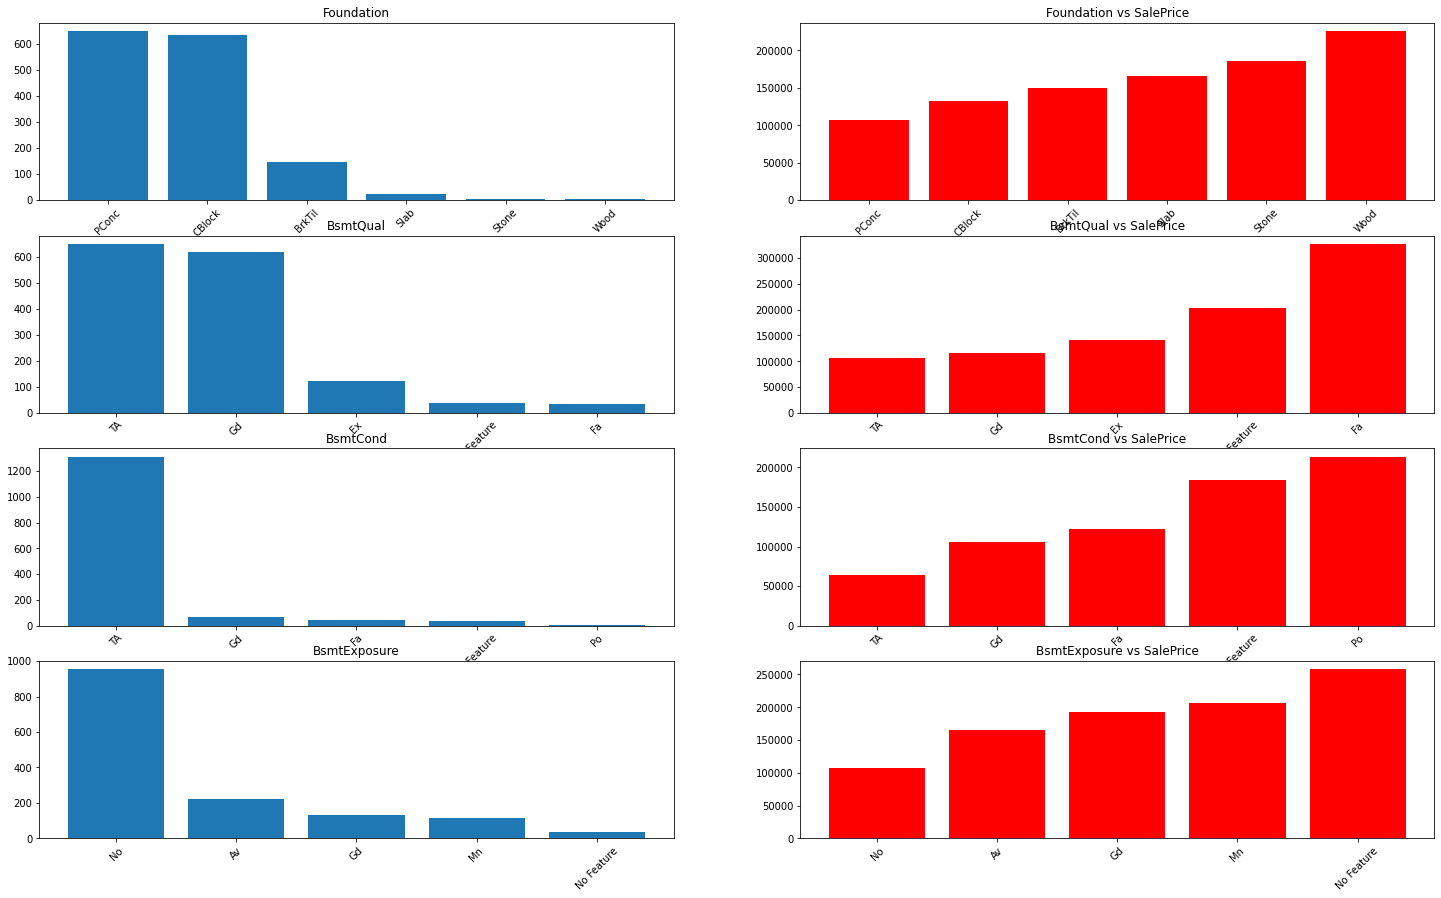

In [ ]:
creating_sub_barplot(categorical_Columns[20:24])

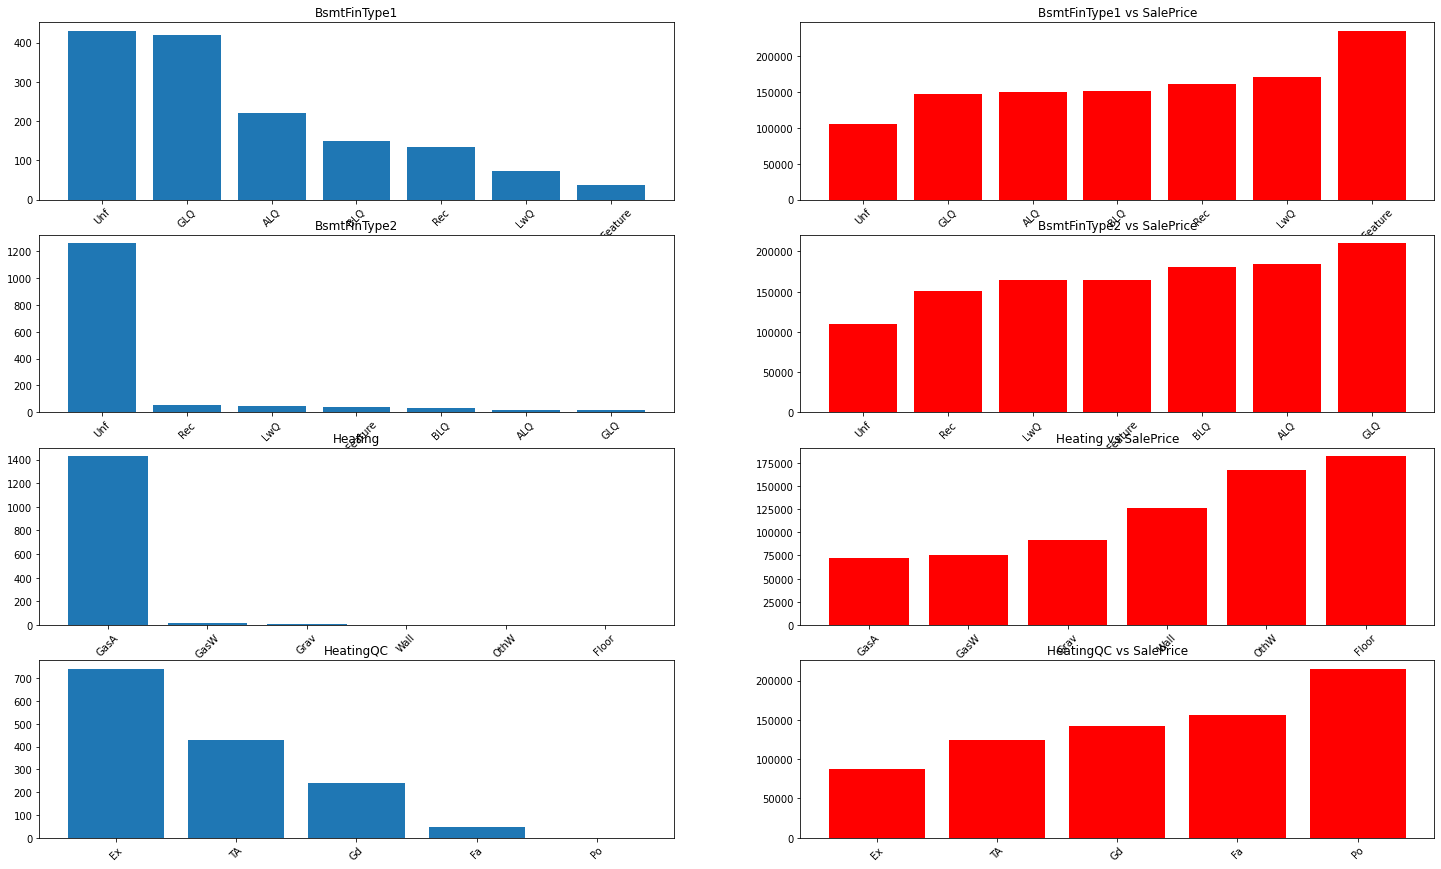

In [ ]:
creating_sub_barplot(categorical_Columns[24:28])

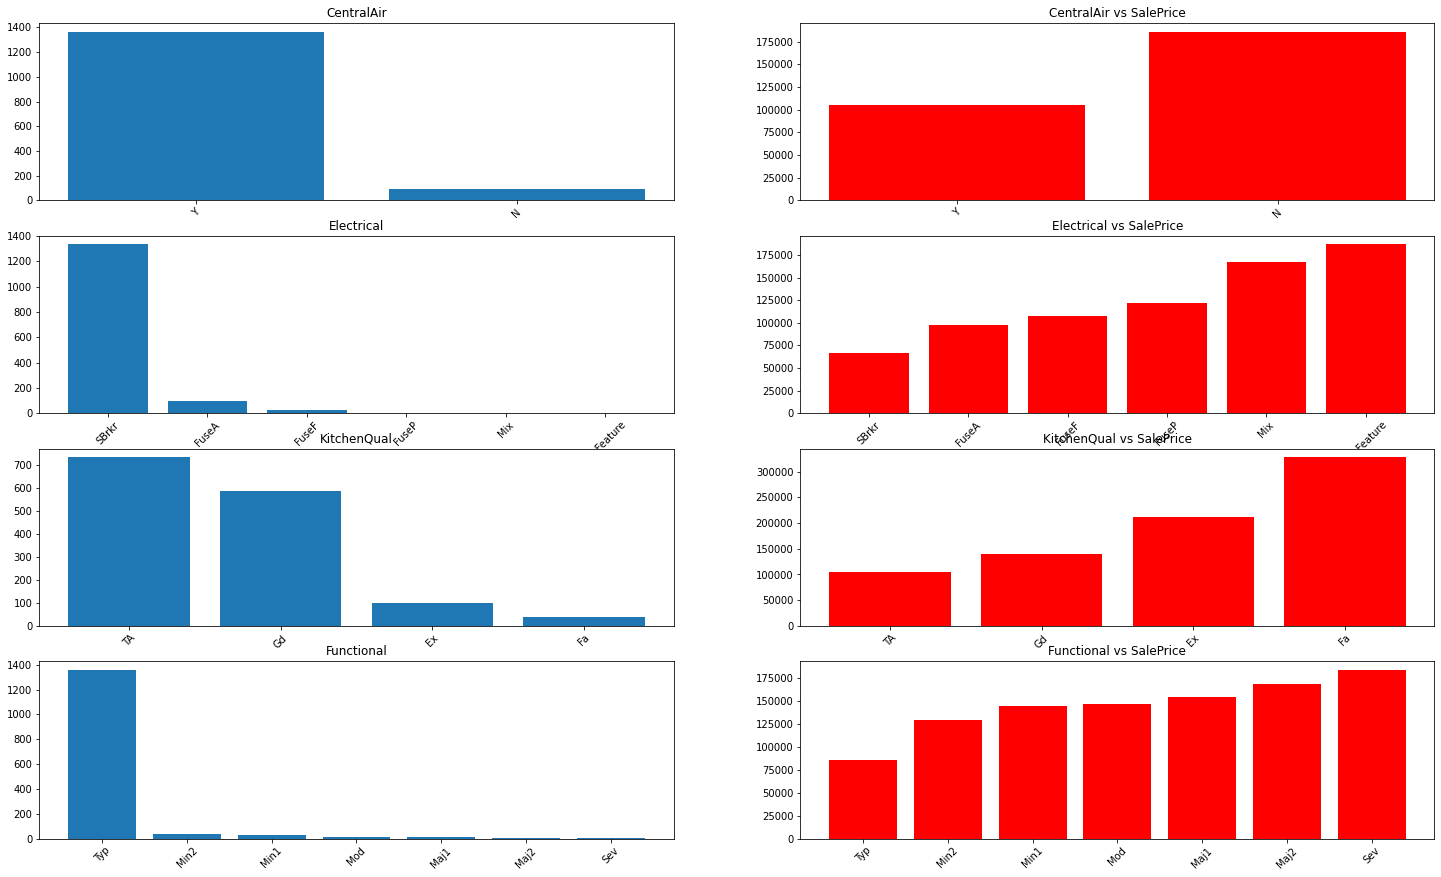

In [ ]:
creating_sub_barplot(categorical_Columns[28:32])

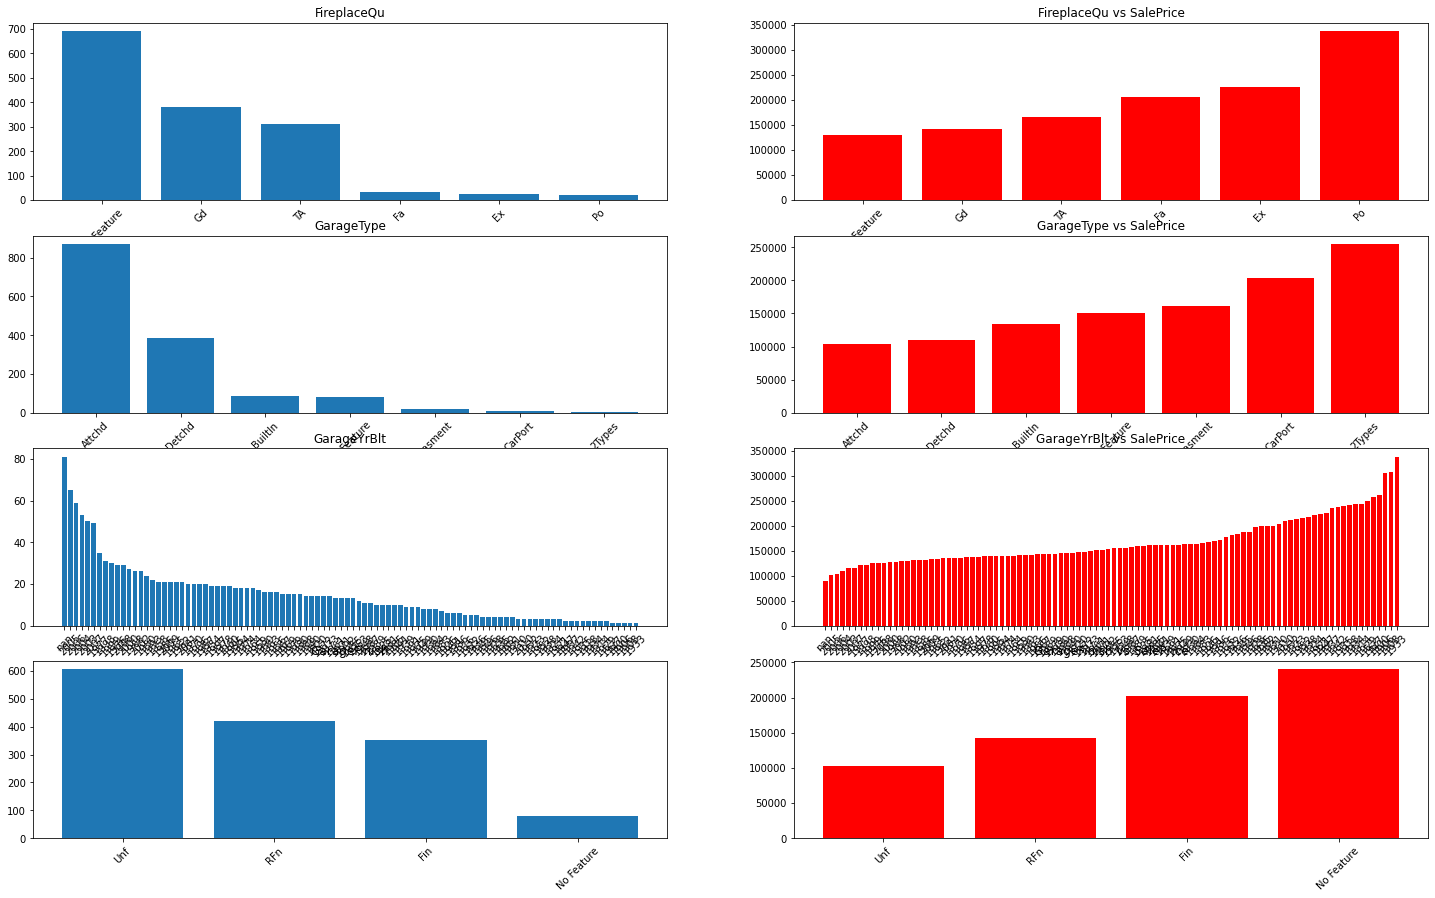

In [ ]:
creating_sub_barplot(categorical_Columns[32:36])

In [ ]:
house_price["GarageYrBlt"].value_counts()

nan     81
2005    65
2006    59
2004    53
2003    50
        ..
1927     1
1900     1
1906     1
1908     1
1933     1
Name: GarageYrBlt, Length: 98, dtype: int64

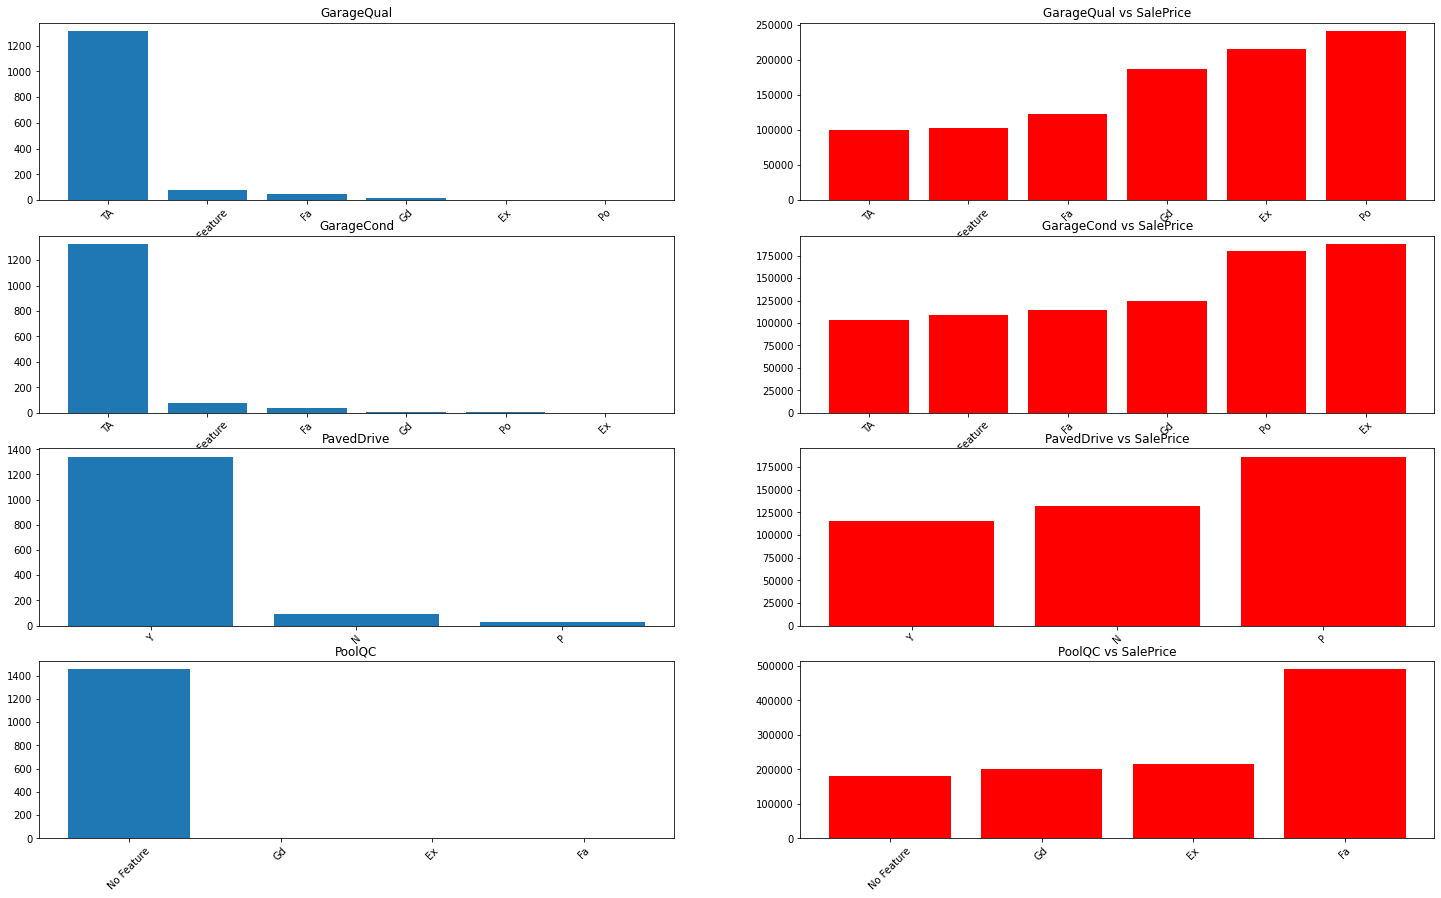

In [ ]:
creating_sub_barplot(categorical_Columns[36:40])

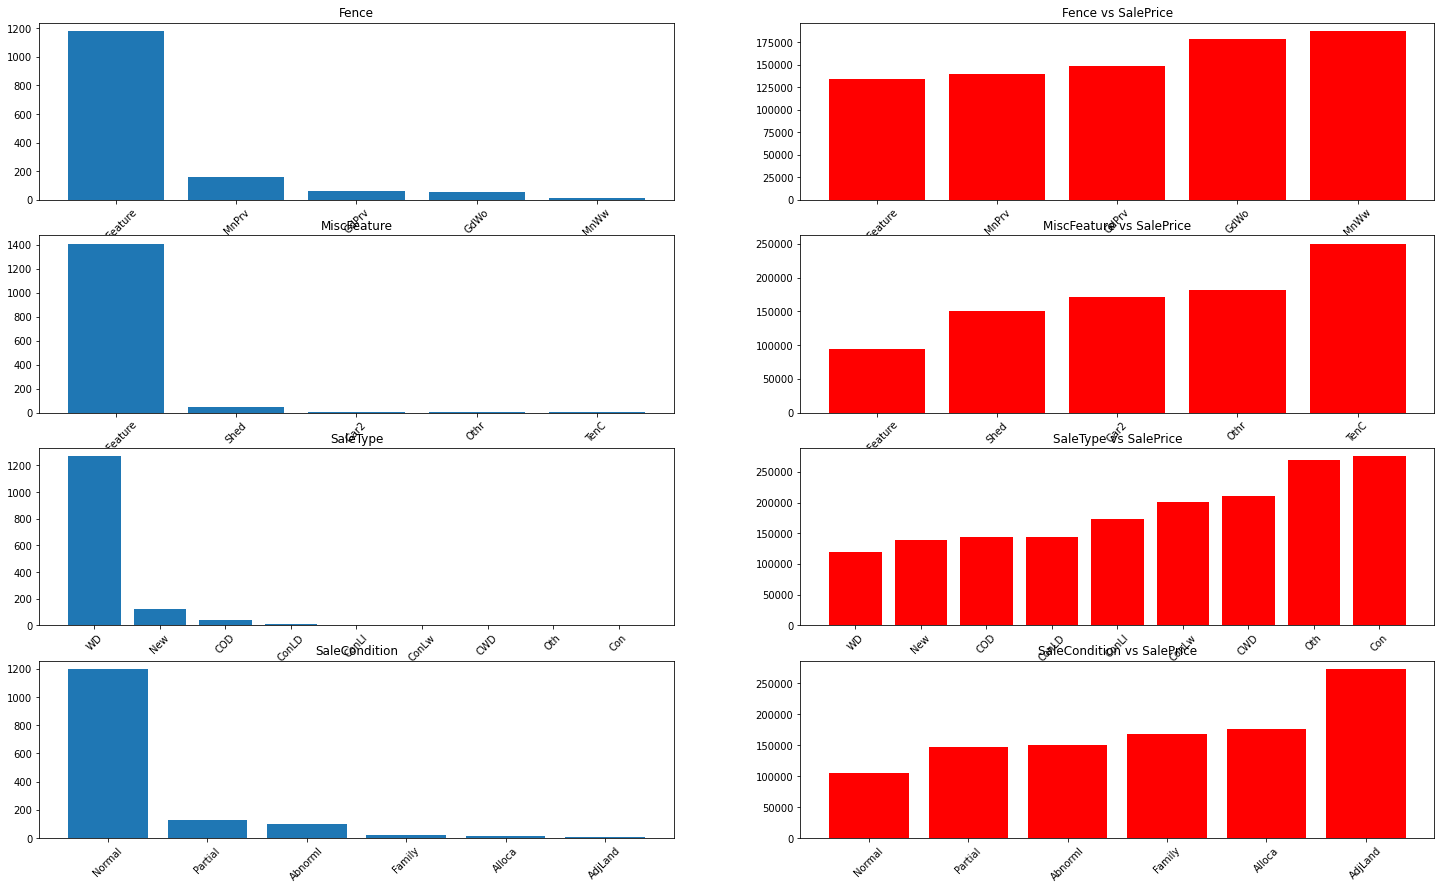

In [ ]:
creating_sub_barplot(categorical_Columns[40:44])

**Common Insights:**
- In initial Insights I got, Homes with extra feature,like basement,Garrage,number of Rooms, and Better Neighbour Hood Has best Sale Price

#### Histogram for numerical values

In [ ]:
def creating_sub_histplot(columns):
  equal_length=6
  row=int(equal_length//3)
  col=int(equal_length//2)

  fig=plt.figure(figsize=(20,10))

  # create subplots
  ax = fig.subplots(row, col)
  count=0
  for i in range(row):
    for j in range(col):
      # Plot a KDE plot of the data in the first subplot
      sb.kdeplot(house_price[columns[count]], ax=ax[i,j])
      ax[i,j].set_title([columns[count]])    
      count+=1

  

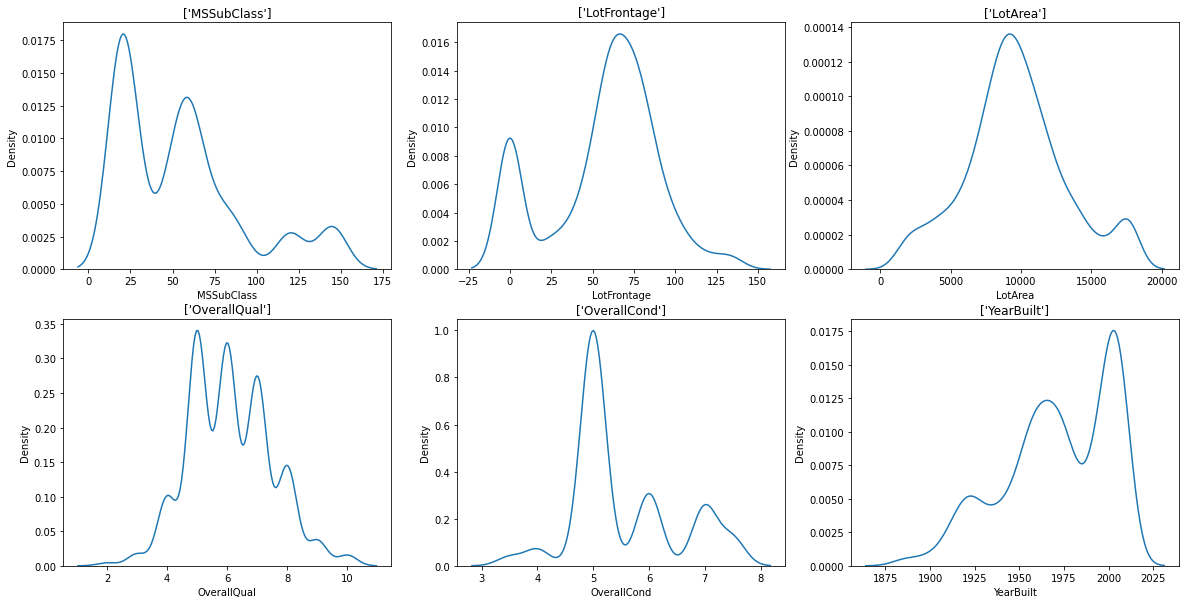

In [ ]:
creating_sub_histplot(numerical_columns[:6])

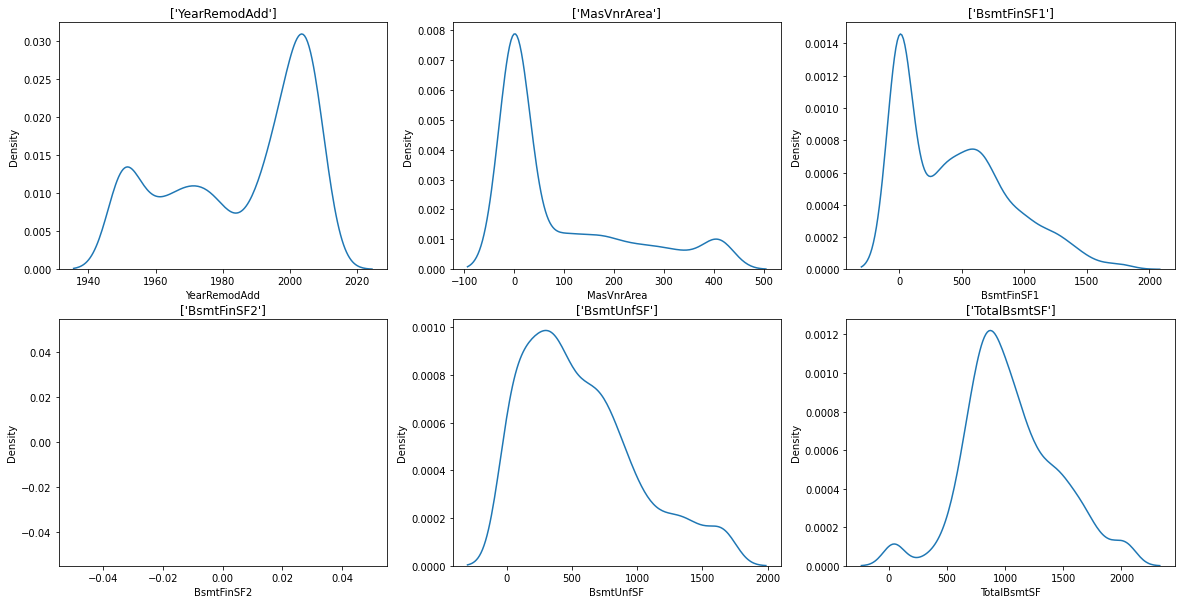

In [ ]:
creating_sub_histplot(numerical_columns[6:12])

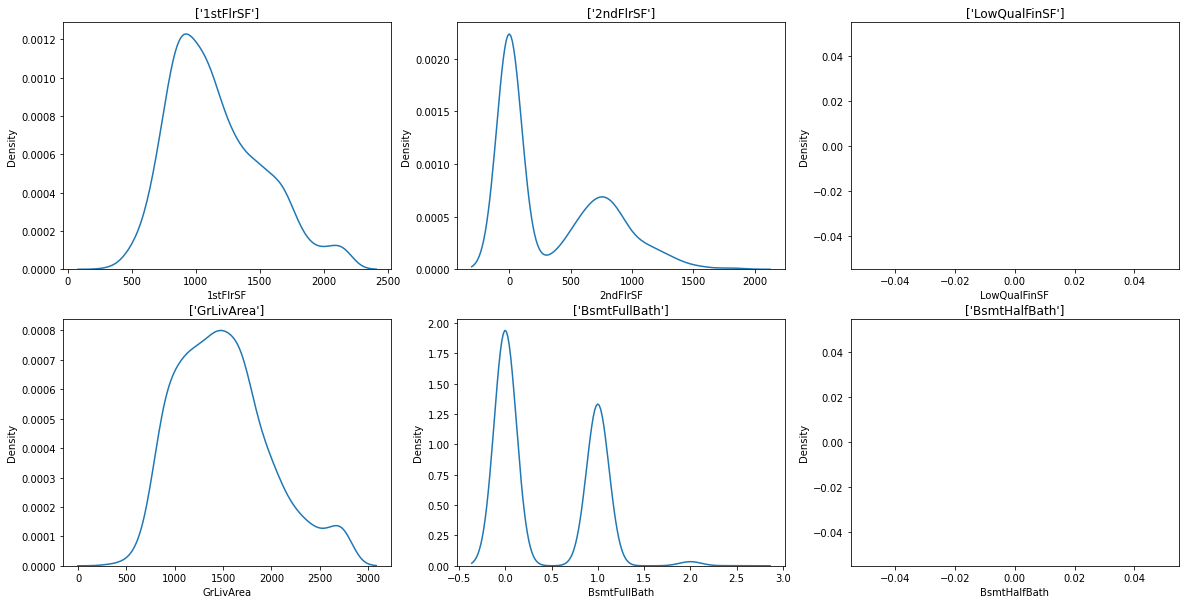

In [ ]:
creating_sub_histplot(numerical_columns[12:18])

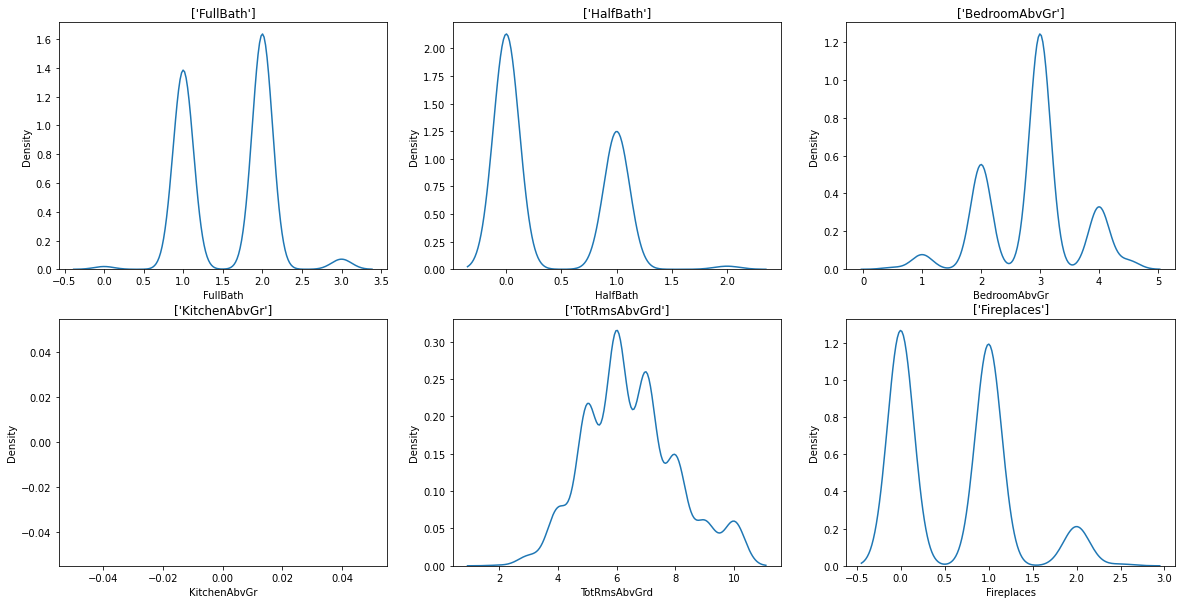

In [ ]:
creating_sub_histplot(numerical_columns[18:24])

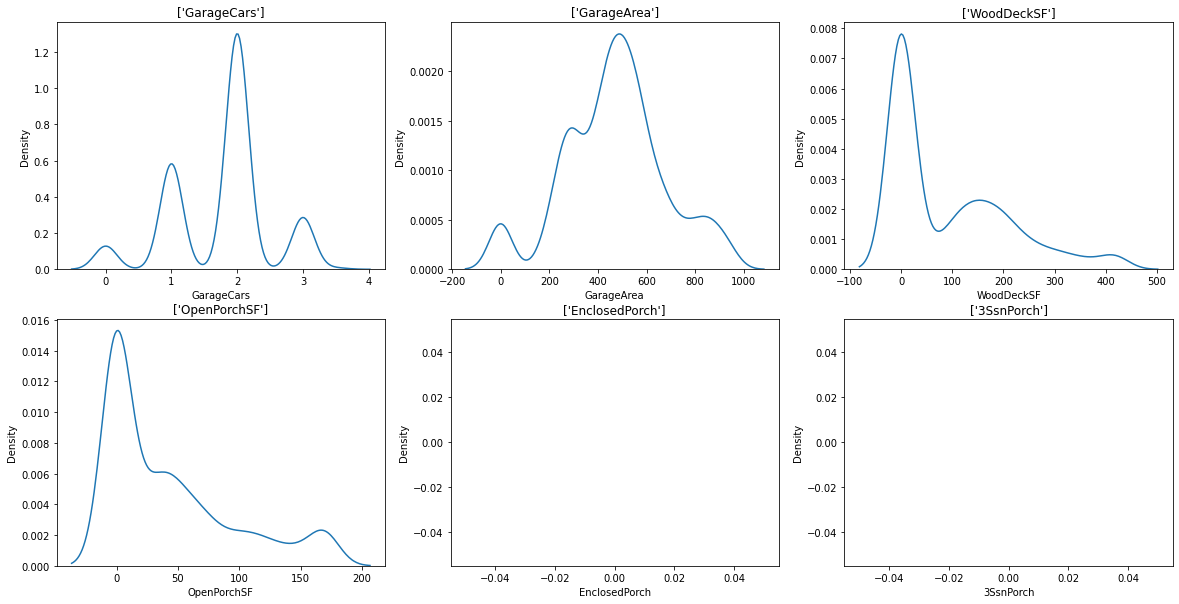

In [ ]:
creating_sub_histplot(numerical_columns[24:30])

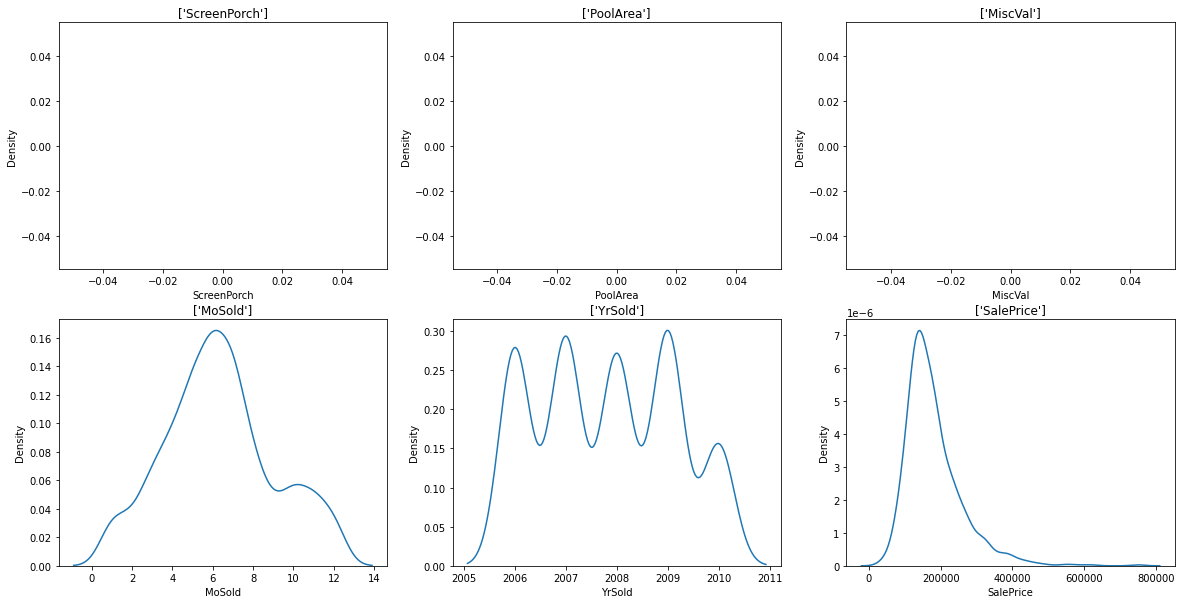

In [ ]:
creating_sub_histplot(numerical_columns[30:36])

**Common Insights:**
- In initial Insights which is some of the columns has Normal distribution, some of colums are left and Right Skewed and some of the columns are Not even have Distribution

#### Handling No variance columns

- There is no use of keeping the columns without any variance so better handle this before building the model

In [ ]:
variance_colummns=house_price.var()
columns_zero_variance=variance_colummns[variance_colummns==0]
columns_zero_variance

BsmtFinSF2       0.0
LowQualFinSF     0.0
BsmtHalfBath     0.0
KitchenAbvGr     0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
dtype: float64

**The above columns are having the variance zero, There is no use of keeping this for model_building**

- This columns had some outliers after handle those, I got the zero variance

In [ ]:
house_price.drop(columns=columns_zero_variance.index,inplace=True)

#### Tranforming the Numerical Variables
- In this problem I'm gonna bring the values in same scale for faster convergence, some times it willl help to reduce the multicollinearity as well.

- Standarization is the method I'm going to do here

In [ ]:
import statistics

def standarization(value,col_name,dataset):
  #Calculating Average or mean
  mean=dataset[col_name].mean()

  # Calculate the standard deviation using the statistics module
  stdev = statistics.stdev(dataset[col_name])

  z_score=(value-mean)/stdev
  return z_score



In [ ]:
columns_parent_dataset=house_price.select_dtypes(["int","float"]).columns
#no_need_convert=dummieVariables.columns

for column in columns_parent_dataset:
  if column !="SalePrice":
    house_price[column]=house_price[column].apply(lambda x: standarization(x,column,house_price))
#columns_parent_dataset

In [ ]:
house_price

In [ ]:
# #Write a datas into csvfile
# house_price.to_csv('/content/drive/MyDrive/ML_Dataset/house_price_Cleaned_standarized.csv', index=False)


#### Import train datas
- Temporarly load standarized data for transform test dataset

In [ ]:
#Mounting the Drive

house_price_temp=pd.read_csv("/content/drive/MyDrive/ML_Dataset/Housing_Australian/house_price_Cleaned_standarized.csv")
house_price_temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.131022,RL,0.237179,-0.333130,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,-0.786974,0.350400,No Feature,No Feature,No Feature,-1.598563,0.138730,WD,Normal,208500
1,-0.935412,RL,0.692573,-0.013184,Pave,No Feature,Reg,Lvl,AllPub,FR2,...,1.767499,-0.811469,No Feature,No Feature,No Feature,-0.488943,-0.614228,WD,Normal,181500
2,0.131022,RL,0.328258,0.445869,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,-0.786974,-0.011493,No Feature,No Feature,No Feature,0.990552,0.138730,WD,Normal,223500
3,0.397630,RL,0.085381,-0.027095,Pave,No Feature,IR1,Lvl,AllPub,Corner,...,-0.786974,-0.144823,No Feature,No Feature,No Feature,-1.598563,-1.367186,WD,Abnorml,140000
4,0.131022,RL,0.814011,1.283293,Pave,No Feature,IR1,Lvl,AllPub,FR2,...,0.858861,0.788482,No Feature,No Feature,No Feature,2.100173,0.138730,WD,Normal,250000


### Transform test data

In [ ]:
house_price_test=pd.read_csv("/content/drive/MyDrive/ML_Dataset/Housing_Australian/test.csv")
house_price_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_without_targetCol=house_price_temp.drop(columns="SalePrice")
train_columns=train_without_targetCol.columns
len(train_columns)

70

In [ ]:
house_price_test=house_price_test[train_columns]

In [ ]:
mode_val=house_price_test["MSZoning"].mode()
house_price_test["MSZoning"]=house_price_test["MSZoning"].fillna(str(mode_val))
house_price_test["MSZoning"].isna().sum()

In [ ]:
null=house_price_test.isna().sum()
idx=null[null>0].index
idx

Index(['LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [ ]:
numerical_dataset=house_price_test[idx].select_dtypes(["int","float"])
numerical_columns=numerical_dataset.columns

for column in numerical_columns:

  house_price_test[column]=house_price_test[column].fillna(house_price_test[column].median())

#house_price_test[numerical_columns]=house_price_test[numerical_columns].fillna(int(house_price_test[numerical_columns].median()))

In [ ]:
house_price_test[idx].select_dtypes("object")

,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,NaN,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,LwQ,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,MnPrv,NaN,WD
1,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,Unf,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,NaN,Gar2,WD
2,NaN,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,Unf,...,Typ,TA,Attchd,Fin,TA,TA,NaN,MnPrv,NaN,WD
3,NaN,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,Unf,...,Typ,Gd,Attchd,Fin,TA,TA,NaN,NaN,NaN,WD
4,NaN,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,Unf,...,Typ,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,AllPub,CemntBd,CmentBd,None,TA,TA,No,Unf,Unf,...,Typ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD
1455,NaN,AllPub,CemntBd,CmentBd,None,TA,TA,No,Rec,Unf,...,Typ,NaN,CarPort,Unf,TA,TA,NaN,NaN,NaN,WD
1456,NaN,AllPub,VinylSd,VinylSd,None,TA,TA,No,ALQ,Unf,...,Typ,TA,Detchd,Unf,TA,TA,NaN,NaN,NaN,WD
1457,NaN,AllPub,HdBoard,Wd Shng,None,Gd,TA,Av,GLQ,Unf,...,Typ,NaN,NaN,NaN,NaN,NaN,NaN,MnPrv,Shed,WD


In [ ]:
for column in ["Exterior1st","Exterior2nd"]:
  house_price_test[column]=house_price_test[column].fillna(str(house_price_test[column].mode()))

#house_price_test[["Exterior1st","Exterior2nd"]]=house_price_test[["Exterior1st","Exterior2nd"]].fillna(house_price_test[["Exterior1st","Exterior2nd"]].mode())

In [ ]:
house_price_test[["Exterior1st","Exterior2nd"]].isna().sum()

Exterior1st    0
Exterior2nd    0
dtype: int64

In [ ]:
null=house_price_test.isna().sum()
idx=null[null>0].index
idx

Index(['Alley', 'Utilities', 'MasVnrType', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [ ]:
house_price_test[idx]=house_price_test[idx].fillna("No Feature")

In [ ]:
house_price_test

In [ ]:
columns_parent_dataset=house_price_test.select_dtypes(["int","float"]).columns
#no_need_convert=dummieVariables.columns

for column in columns_parent_dataset:
  #if column !="SalePrice":
    house_price_test[column]=house_price_test[column].apply(lambda x: standarization(x,column,house_price_test))
#columns_parent_dataset

In [ ]:
house_price_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,-0.874411,RH,0.567135,0.363804,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,Y,0.366553,-0.701387,No Feature,MnPrv,No Feature,-0.038268,1.713318,WD,Normal
1,-0.874411,RL,0.615752,0.897553,Pave,No Feature,IR1,Lvl,AllPub,Corner,...,Y,2.347063,-0.178765,No Feature,No Feature,Gar2,-0.038268,1.713318,WD,Normal
2,0.061330,RL,0.275437,0.809368,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,Y,0.930176,-0.207799,No Feature,MnPrv,No Feature,-1.140224,1.713318,WD,Normal
3,0.061330,RL,0.469903,0.032053,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,Y,2.088735,-0.178765,No Feature,No Feature,No Feature,-0.038268,1.713318,WD,Normal
4,1.464941,RL,-1.231670,-0.971475,Pave,No Feature,IR1,HLS,AllPub,Inside,...,Y,-0.729382,0.489031,No Feature,No Feature,No Feature,-1.874861,1.713318,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.400682,RM,-2.301230,-1.590785,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,Y,-0.729382,-0.701387,No Feature,No Feature,No Feature,-0.038268,-1.359492,WD,Normal
1455,2.400682,RM,-2.301230,-1.599260,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,Y,-0.729382,-0.352972,No Feature,No Feature,No Feature,-0.772905,-1.359492,WD,Abnorml
1456,-0.874411,RL,4.456443,2.054445,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,Y,2.981139,-0.701387,No Feature,No Feature,No Feature,1.063688,-1.359492,WD,Abnorml
1457,0.646168,RL,-0.307959,0.125484,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,Y,-0.103134,-0.236834,No Feature,MnPrv,Shed,0.329051,-1.359492,WD,Normal


In [ ]:
#Write a datas into csvfile
house_price_test.to_csv('/content/drive/MyDrive/ML_Dataset/house_price_test_Cleaned_standarized.csv', index=False)


## I've cleaned and visualized some of the categorical and Numerical Column, I'll continue Data preparation, Handling Multicollinearity and Model Creation on upcomming Notebooks


**Link for Data preparation and model building notebook:**

[https://colab.research.google.com/drive/1kgmJz-sQHkK56fWq2QeR_kwSI0-R0gUw#scrollTo=vPpU3mJeUv4_](https://colab.research.google.com/drive/1kgmJz-sQHkK56fWq2QeR_kwSI0-R0gUw#scrollTo=vPpU3mJeUv4_)

**GitHub:**

https://github.com/HussainPythonista/Australian_Housing_Prediction/blob/main/Housing_DataSet_Data_Preparation_Model.ipynb